In [1]:
# Import Libraries (Other Libraries are Import When we used)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import Dataset
elon = pd.read_csv("C:\Local Disk (A);\Excelr\Assignment Excelr\\11 Text Mining\Elon_musk.csv"
                   ,error_bad_lines=False, encoding='windows-1252')

C:\Users\aksha\AppData\Local\Temp\ipykernel_6560\3247364486.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  elon = pd.read_csv("C:\Local Disk (A);\Excelr\Assignment Excelr\\11 Text Mining\Elon_musk.csv"


# EDA

In [3]:
elon

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
# Check Data
elon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [5]:
elon.describe()

,Unnamed: 0
count,1999.000000
mean,1000.000000
std,577.205914
min,1.000000
25%,500.500000
50%,1000.000000
75%,1499.500000
max,1999.000000


In [6]:
# Check Null Values
elon.isnull().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [7]:
# Check any Duplicated Reviews
elon.duplicated().sum()

0

In [8]:
# Drop Unimportant Data
elon.drop(['Unnamed: 0'], axis=1)

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


# Text Processing

In [9]:
# Remove leading, trailing and empty string
elon = [Text.strip() for Text in elon.Text] # remove both the leading and the trailing characters
elon = [Text for Text in elon if Text] # removes empty strings, because they are considered in Python as False
elon[0:10]

['@kunalb11 I’m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [10]:
# Joining the list into one string/text
cmt = ' '.join(elon)
cmt

'@kunalb11 I’m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F

In [11]:
len(cmt)

158805

In [12]:
# remove Twitter username handles from a given twitter text. (Removes @usernames)
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer(strip_handles=True)
rem_username = tokenizer.tokenize(cmt)
rem_username

['I',
 '’',
 'm',
 'an',
 'alien',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'next-level',
 '.',
 'Have',
 'you',
 'tried',
 'it',
 '?',
 'Great',
 'interview',
 '!',
 'Doge',
 'is',
 'underestimated',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 '.',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 '!',
 '!',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 '!',
 'https://t.co/9WFKMYu2oj',
 'Frodo',
 'was',
 'the',
 'underdoge',
 ',',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 ',',
 'Himself',
 'most',
 'of',
 'all',
 '.',
 'https://t.co/zGxJFDzzrM',
 'Haha',
 'thanks',
 ':)',
 'Indeed',
 '!',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'real-world',
 'time',
 'allocation',
 '.',
 'The',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'Just',
 'sent',
 'some',
 'Just',
 'agree',
 'to',
 'do',
 'Clubhouse',
 'with',
 'https://t.co/3rWE9uHSTS',
 'It',
 '’',

In [13]:
# Again oining the list into one string/text
cmt_tokens = ' '.join(rem_username)
cmt_tokens

'I ’ m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It ’ s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won ’ t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to launch th

In [14]:
#Remove punctuation
import string
rem_punctuation = cmt_tokens.translate(str.maketrans('','',string.punctuation))
rem_punctuation

'I ’ m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It ’ s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won ’ t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway tog

In [15]:
# Remove online portals name like https, url
import re
rem_url = re.sub(r'http\S+','',rem_punctuation) 
rem_url

'I ’ m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It ’ s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha  Any crypto wallet that won ’ t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reasonably well

In [16]:
# Tokenization
from nltk.tokenize import word_tokenize
cmt_word = word_tokenize(rem_url)
cmt_word

['I',
 '’',
 'm',
 'an',
 'alien',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'Great',
 'interview',
 'Doge',
 'is',
 'underestimated',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'Frodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'Haha',
 'thanks',
 'Indeed',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'Just',
 'sent',
 'some',
 'Just',
 'agree',
 'to',
 'do',
 'Clubhouse',
 'with',
 'It',
 '’',
 's',
 'getting',
 'real',
 'Bought',
 'some',
 'Dogecoin',
 'for',
 'lil',
 'X',
 'so',
 'he',
 'can',
 'be',
 'a',
 'toddler',
 'hodler',
 'He',
 'definitely',
 '

In [17]:
len(cmt_word)

18324

In [18]:
# Remove Stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_word_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I','https']
stop_words.extend(stop_word_list)

stop_tokens = [word for word in cmt_word if not word in stop_words]
stop_tokens

['’',
 'alien',
 'Ray',
 'tracing',
 'Cyberpunk',
 'HDR',
 'nextlevel',
 'Have',
 'tried',
 'Great',
 'interview',
 'Doge',
 'underestimated',
 'Congratulations',
 'Tesla',
 'China',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'next',
 'even',
 'Happy',
 'New',
 'Year',
 'Ox',
 'Frodo',
 'underdoge',
 'All',
 'thought',
 'would',
 'fail',
 'Himself',
 'Haha',
 'thanks',
 'Indeed',
 'Tweets',
 'definitely',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'entertaining',
 'outcome',
 'likely',
 'Just',
 'sent',
 'Just',
 'agree',
 'Clubhouse',
 'It',
 '’',
 'getting',
 'real',
 'Bought',
 'Dogecoin',
 'lil',
 'X',
 'toddler',
 'hodler',
 'He',
 'definitely',
 'issues',
 'sentencing',
 'seems',
 'bit',
 'high',
 'Thanks',
 'fixing',
 'Please',
 'unlock',
 'account',
 'This',
 'true',
 'power',
 'Any',
 'crypto',
 'wallet',
 '’',
 'give',
 'private',
 'keys',
 'avoided',
 'costs',
 'Your',
 'app',
 'sucks',
 'RT',
 'NASA',
 'selected',
 'Falcon',
 'Heavy',
 'launch',


In [19]:
len(stop_tokens)

12240

In [20]:
# Normalize the data (UpperCase Letter Convert to LowerCase)
lower_case = [Text.lower() for Text in stop_tokens]
lower_case

['’',
 'alien',
 'ray',
 'tracing',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'tried',
 'great',
 'interview',
 'doge',
 'underestimated',
 'congratulations',
 'tesla',
 'china',
 'amazing',
 'execution',
 'last',
 'year',
 'now',
 'next',
 'even',
 'happy',
 'new',
 'year',
 'ox',
 'frodo',
 'underdoge',
 'all',
 'thought',
 'would',
 'fail',
 'himself',
 'haha',
 'thanks',
 'indeed',
 'tweets',
 'definitely',
 'represent',
 'realworld',
 'time',
 'allocation',
 'the',
 'entertaining',
 'outcome',
 'likely',
 'just',
 'sent',
 'just',
 'agree',
 'clubhouse',
 'it',
 '’',
 'getting',
 'real',
 'bought',
 'dogecoin',
 'lil',
 'x',
 'toddler',
 'hodler',
 'he',
 'definitely',
 'issues',
 'sentencing',
 'seems',
 'bit',
 'high',
 'thanks',
 'fixing',
 'please',
 'unlock',
 'account',
 'this',
 'true',
 'power',
 'any',
 'crypto',
 'wallet',
 '’',
 'give',
 'private',
 'keys',
 'avoided',
 'costs',
 'your',
 'app',
 'sucks',
 'rt',
 'nasa',
 'selected',
 'falcon',
 'heavy',
 'launch',


In [21]:
len(lower_case)

12240

In [22]:
# Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stem_tokens = [ps.stem(word) for word in lower_case]
stem_tokens

['’',
 'alien',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'tri',
 'great',
 'interview',
 'doge',
 'underestim',
 'congratul',
 'tesla',
 'china',
 'amaz',
 'execut',
 'last',
 'year',
 'now',
 'next',
 'even',
 'happi',
 'new',
 'year',
 'ox',
 'frodo',
 'underdog',
 'all',
 'thought',
 'would',
 'fail',
 'himself',
 'haha',
 'thank',
 'inde',
 'tweet',
 'definit',
 'repres',
 'realworld',
 'time',
 'alloc',
 'the',
 'entertain',
 'outcom',
 'like',
 'just',
 'sent',
 'just',
 'agre',
 'clubhous',
 'it',
 '’',
 'get',
 'real',
 'bought',
 'dogecoin',
 'lil',
 'x',
 'toddler',
 'hodler',
 'he',
 'definit',
 'issu',
 'sentenc',
 'seem',
 'bit',
 'high',
 'thank',
 'fix',
 'pleas',
 'unlock',
 'account',
 'thi',
 'true',
 'power',
 'ani',
 'crypto',
 'wallet',
 '’',
 'give',
 'privat',
 'key',
 'avoid',
 'cost',
 'your',
 'app',
 'suck',
 'rt',
 'nasa',
 'select',
 'falcon',
 'heavi',
 'launch',
 'first',
 'two',
 'element',
 'lunar',
 'gateway',
 'togeth',
 'one',


In [23]:
len(stem_tokens)

12240

In [24]:
# NLP english language model of spacy library
import spacy

In [25]:
# Lemmatization
nlp = spacy.load('en_core_web_sm')
doc = nlp(' '.join(lower_case))
print(doc)

’ alien ray tracing cyberpunk hdr nextlevel have tried great interview doge underestimated congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thanks indeed tweets definitely represent realworld time allocation the entertaining outcome likely just sent just agree clubhouse it ’ getting real bought dogecoin lil x toddler hodler he definitely issues sentencing seems bit high thanks fixing please unlock account this true power any crypto wallet ’ give private keys avoided costs your app sucks rt nasa selected falcon heavy launch first two elements lunar gateway together one mission once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however … spacex needs pass deep chasm negative cash flow next year … lowest cost per ton carbon sequestered net value product made must scalable g … it ’ meant price countries only difference taxes shipping this i

In [26]:
lemmas = [token.lemma_ for token in doc]
lemmas

["'",
 'alien',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'try',
 'great',
 'interview',
 'doge',
 'underestimate',
 'congratulation',
 'tesla',
 'china',
 'amazing',
 'execution',
 'last',
 'year',
 'now',
 'next',
 'even',
 'happy',
 'new',
 'year',
 'ox',
 'frodo',
 'underdoge',
 'all',
 'thought',
 'would',
 'fail',
 'himself',
 'haha',
 'thank',
 'indeed',
 'tweet',
 'definitely',
 'represent',
 'realworld',
 'time',
 'allocation',
 'the',
 'entertaining',
 'outcome',
 'likely',
 'just',
 'send',
 'just',
 'agree',
 'clubhouse',
 'it',
 "'",
 'get',
 'real',
 'buy',
 'dogecoin',
 'lil',
 'x',
 'toddler',
 'hodler',
 'he',
 'definitely',
 'issue',
 'sentencing',
 'seem',
 'bit',
 'high',
 'thank',
 'fix',
 'please',
 'unlock',
 'account',
 'this',
 'true',
 'power',
 'any',
 'crypto',
 'wallet',
 "'",
 'give',
 'private',
 'key',
 'avoid',
 'cost',
 'your',
 'app',
 'suck',
 'rt',
 'nasa',
 'select',
 'falcon',
 'heavy',
 'launch',
 'first',
 'two',
 'element'

In [27]:
# Our Text Data was All clean
clean_text = ' '.join(lemmas)
clean_text

'\' alien ray trace cyberpunk hdr nextlevel have try great interview doge underestimate congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thank indeed tweet definitely represent realworld time allocation the entertaining outcome likely just send just agree clubhouse it \' get real buy dogecoin lil x toddler hodler he definitely issue sentencing seem bit high thank fix please unlock account this true power any crypto wallet \' give private key avoid cost your app suck rt nasa select falcon heavy launch first two element lunar gateway together one mission once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however … spacex need pass deep chasm negative cash flow next year … low cost per ton carbon sequester net value product make must scalable g … it \' mean price country only difference taxis ship this intend earth may idea apply mar xprize

# Feature Extraction

In [28]:
# Feature Extraction using count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv_fe = cv.fit_transform(lemmas)
cv_fe

<12265x3409 sparse matrix of type '<class 'numpy.int64'>'
	with 11118 stored elements in Compressed Sparse Row format>

In [29]:
print(cv.vocabulary_)

{'alien': 194, 'ray': 2344, 'trace': 3009, 'cyberpunk': 766, 'hdr': 1357, 'nextlevel': 1957, 'have': 1352, 'try': 3039, 'great': 1304, 'interview': 1554, 'doge': 889, 'underestimate': 3172, 'congratulation': 674, 'tesla': 2914, 'china': 583, 'amazing': 217, 'execution': 1058, 'last': 1637, 'year': 3389, 'now': 1984, 'next': 1956, 'even': 1032, 'happy': 1339, 'new': 1954, 'ox': 2085, 'frodo': 1207, 'underdoge': 3171, 'all': 197, 'thought': 2951, 'would': 3374, 'fail': 1092, 'himself': 1400, 'haha': 1327, 'thank': 2925, 'indeed': 1495, 'tweet': 3054, 'definitely': 803, 'represent': 2410, 'realworld': 2359, 'time': 2967, 'allocation': 199, 'the': 2930, 'entertaining': 1002, 'outcome': 2064, 'likely': 1692, 'just': 1596, 'send': 2553, 'agree': 179, 'clubhouse': 612, 'it': 1573, 'get': 1265, 'real': 2354, 'buy': 502, 'dogecoin': 891, 'lil': 1693, 'toddler': 2979, 'hodler': 1406, 'he': 1358, 'issue': 1572, 'sentencing': 2558, 'seem': 2545, 'bit': 418, 'high': 1392, 'fix': 1153, 'please': 217

In [30]:
print(cv.get_feature_names())

['000', '005', '10', '100', '1000', '10000', '107', '10x', '11', '12', '122', '13', '130', '14', '140', '149', '15', '150', '155', '16', '162', '17', '18', '1880s', '1b', '1st', '20', '200', '2007', '2008', '2009', '2012', '2017', '2020', '2021', '2024', '2026', '2030', '20k', '210', '218', '21st', '22', '225', '23', '230', '24', '240', '25', '250', '250kw', '25gunsteslacom', '25k', '25th', '28', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3d', '3rd', '40', '400', '42', '420', '4227', '430', '43rd', '445', '448', '4530', '4680', '479000', '48', '4d', '4th', '50', '50000', '50k', '60', '60000', '65', '69420', '6f', '6k', '727', '74', '78', '7th', '90', '9007', '922', '948', '95', '99', 'aber', 'able', 'abo', 'aboard', 'abort', 'about', 'above', 'absence', 'absolute', 'absolutely', 'absorb', 'absorption', 'absurd', 'absurdly', 'ac', 'academia', 'accel', 'accelera', 'accelerate', 'acceleration', 'accelerator', 

C:\Users\aksha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [31]:
print(cv_fe.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [32]:
print(cv_fe.toarray().shape)

(12265, 3409)


# Let's see how can bigrams and trigrams can be included here

In [33]:
# count vectorizer with  n-gram (bi-gram & trigram)
cv_ngram = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram.fit_transform(lemmas)

In [34]:
print(cv_ngram.get_feature_names())
print(bow_matrix_ngram.toarray())

['actually', 'ai', 'also', 'back', 'big', 'booster', 'car', 'come', 'cool', 'could', 'crew', 'day', 'design', 'do', 'dragon', 'earth', 'engine', 'even', 'ever', 'exactly', 'falcon', 'first', 'flight', 'fsd', 'future', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'if', 'it', 'land', 'launch', 'life', 'like', 'look', 'lot', 'love', 'make', 'many', 'mar', 'maybe', 'mission', 'model', 'month', 'much', 'need', 'new', 'next', 'no', 'not', 'ok', 'one', 'part', 'people', 'point', 'pretty', 'probably', 'production', 'right', 'rocket', 'rt', 'say', 'seem', 'soon', 'space', 'spacex', 'starlink', 'starship', 'still', 'super', 'sure', 'take', 'tesla', 'test', 'thank', 'that', 'the', 'there', 'they', 'think', 'this', 'time', 'true', 'try', 'ufe0f', 'use', 'way', 'we', 'week', 'well', 'will', 'work', 'would', 'yeah', 'year', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Word Cloud

In [35]:
# Create a WordCloud
from wordcloud import WordCloud, STOPWORDS
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

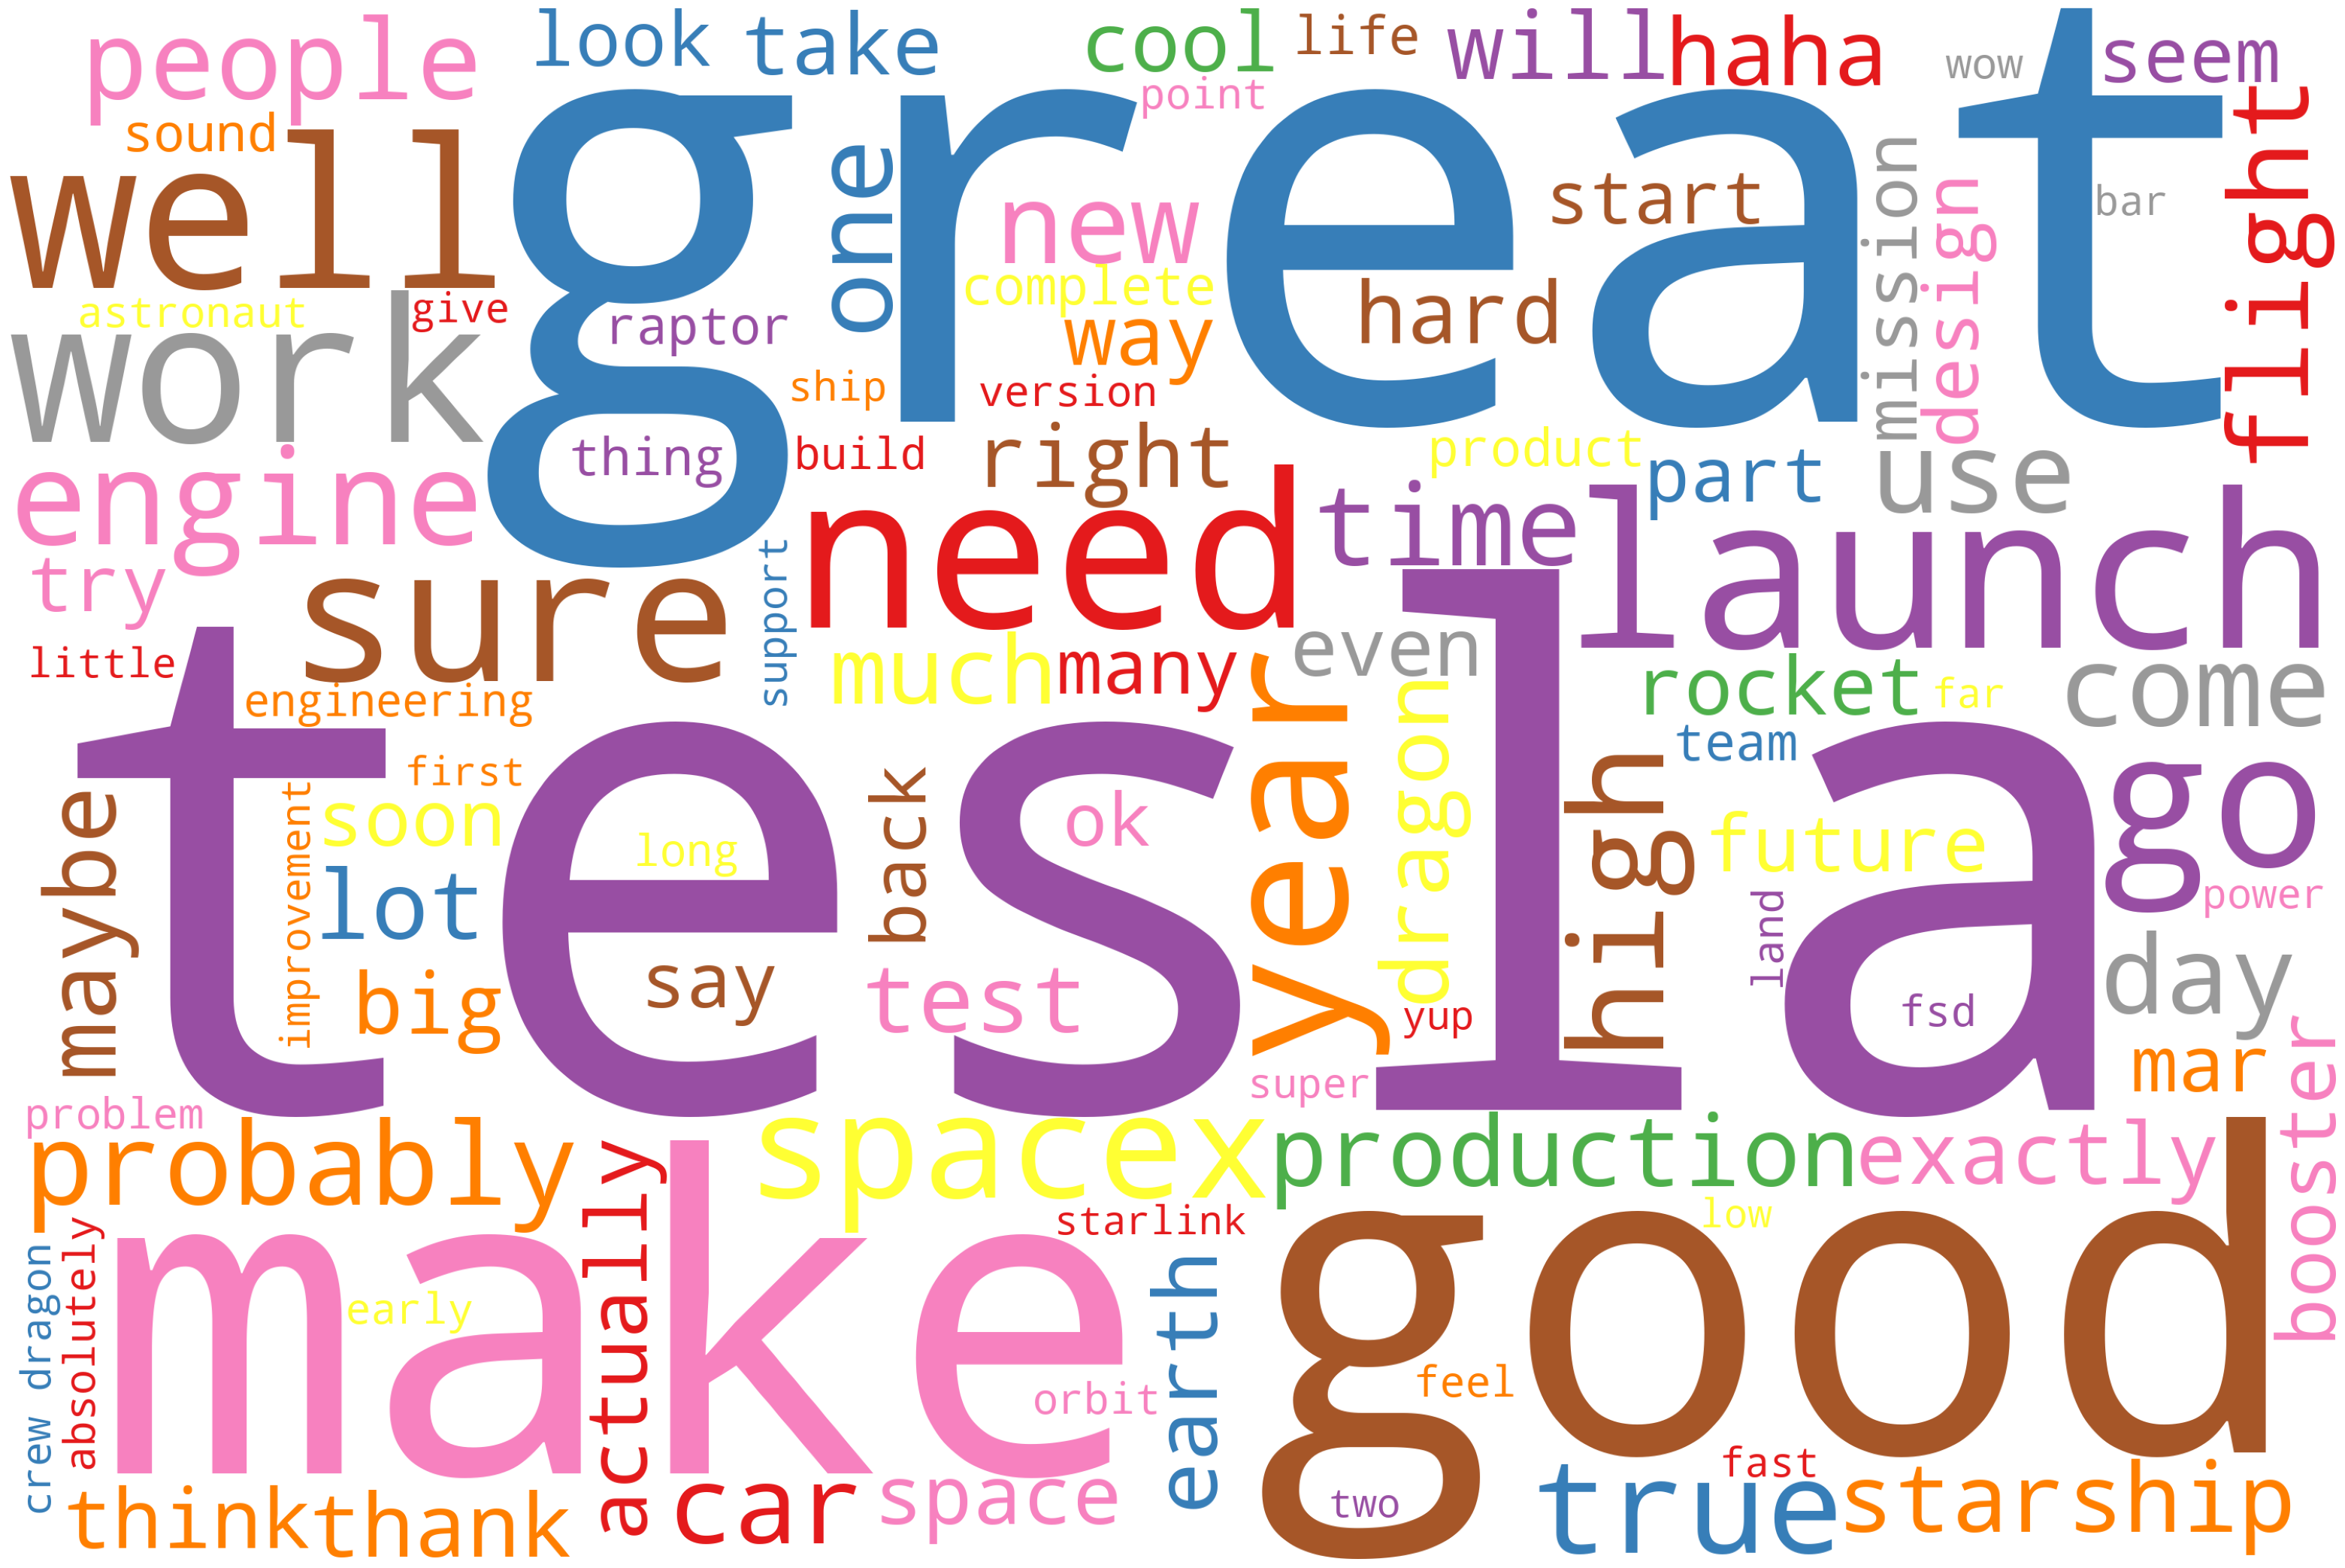

In [36]:
stopwords = STOPWORDS
stopwords.add('pron')
stopwords.add('rt')
stopwords.add('yeah')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='white', max_words=100,colormap='Set1',stopwords=stopwords)
wordcloud.generate(clean_text)
# Plot
plot_cloud(wordcloud)

# Named Entity Recognition

In [37]:
import spacy
nlp = spacy.load('en_core_web_sm')

#Parts of Speech (POS) Tagging

blocks = clean_text
text_blocks = nlp(blocks)
spacy.displacy.render(text_blocks, style='ent' , jupyter=True)

In [38]:
for token in text_blocks:
    print(token, token.pos_)

' PUNCT
alien PROPN
ray PROPN
trace NOUN
cyberpunk NOUN
hdr NOUN
nextlevel NOUN
have AUX
try VERB
great ADJ
interview NOUN
doge ADJ
underestimate ADJ
congratulation NOUN
tesla NOUN
china PROPN
amazing ADJ
execution NOUN
last ADJ
year NOUN
now ADV
next ADV
even ADV
happy ADJ
new ADJ
year NOUN
ox NOUN
frodo NOUN
underdoge NOUN
all DET
thought NOUN
would AUX
fail VERB
himself PRON
haha PROPN
thank VERB
indeed ADV
tweet PROPN
definitely ADV
represent VERB
realworld NOUN
time NOUN
allocation NOUN
the DET
entertaining ADJ
outcome NOUN
likely ADV
just ADV
send VERB
just ADV
agree VERB
clubhouse NOUN
it PRON
' PUNCT
get VERB
real ADJ
buy NOUN
dogecoin NOUN
lil NOUN
x PROPN
toddler NOUN
hodler NOUN
he PRON
definitely ADV
issue VERB
sentencing NOUN
seem VERB
bit NOUN
high ADJ
thank VERB
fix NOUN
please INTJ
unlock VERB
account VERB
this DET
true ADJ
power NOUN
any DET
crypto ADJ
wallet NOUN
' PUNCT
give VERB
private ADJ
key NOUN
avoid NOUN
cost VERB
your PRON
app NOUN
suck NOUN
rt PROPN
nasa PRO

In [39]:
# Filtering the nouns and verbs only
noun_verbs = [token.text for token in text_blocks if token.pos_ in ('NOUN', "VERB")]
noun_verbs

['trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'try',
 'interview',
 'congratulation',
 'tesla',
 'execution',
 'year',
 'year',
 'ox',
 'frodo',
 'underdoge',
 'thought',
 'fail',
 'thank',
 'represent',
 'realworld',
 'time',
 'allocation',
 'outcome',
 'send',
 'agree',
 'clubhouse',
 'get',
 'buy',
 'dogecoin',
 'lil',
 'toddler',
 'hodler',
 'issue',
 'sentencing',
 'seem',
 'bit',
 'thank',
 'fix',
 'unlock',
 'account',
 'power',
 'wallet',
 'give',
 'key',
 'avoid',
 'cost',
 'app',
 'suck',
 'launch',
 'element',
 'gateway',
 'mission',
 'predict',
 'cash',
 'flow',
 'starlink',
 'starlink',
 'endeavor',
 'spacex',
 'pass',
 'cash',
 'flow',
 'year',
 'cost',
 'ton',
 'carbon',
 'sequester',
 'value',
 'product',
 'make',
 'scalable',
 'g',
 'mean',
 'price',
 'country',
 'difference',
 'taxis',
 'ship',
 'intend',
 'earth',
 'idea',
 'apply',
 'team',
 'manage',
 'carbon',
 'capture',
 'prize',
 'tesla',
 'receive',
 'stock',
 'comp',
 'stock',
 'option',
 'take',
 'table',
 

In [40]:
# Count the noun & verbs tokens
CV = CountVectorizer()
X = CV.fit_transform(noun_verbs)
X

<5689x1941 sparse matrix of type '<class 'numpy.int64'>'
	with 5635 stored elements in Compressed Sparse Row format>

In [41]:
# Same word Addition
sum_word = X.sum(axis=0)
sum_word

matrix([[3, 1, 1, ..., 1, 1, 3]], dtype=int64)

In [42]:
word_freq = [(word, sum_word[0, idx]) for word, idx in CV.vocabulary_.items()]
word_freq

[('trace', 1),
 ('cyberpunk', 5),
 ('hdr', 1),
 ('nextlevel', 2),
 ('try', 19),
 ('interview', 4),
 ('congratulation', 7),
 ('tesla', 72),
 ('execution', 1),
 ('year', 49),
 ('ox', 1),
 ('frodo', 1),
 ('underdoge', 1),
 ('thought', 4),
 ('fail', 5),
 ('thank', 20),
 ('represent', 1),
 ('realworld', 1),
 ('time', 36),
 ('allocation', 3),
 ('outcome', 4),
 ('send', 8),
 ('agree', 11),
 ('clubhouse', 2),
 ('get', 39),
 ('buy', 7),
 ('dogecoin', 2),
 ('lil', 1),
 ('toddler', 1),
 ('hodler', 1),
 ('issue', 4),
 ('sentencing', 1),
 ('seem', 18),
 ('bit', 8),
 ('fix', 9),
 ('unlock', 1),
 ('account', 1),
 ('power', 12),
 ('wallet', 1),
 ('give', 14),
 ('key', 1),
 ('avoid', 2),
 ('cost', 12),
 ('app', 1),
 ('suck', 3),
 ('launch', 61),
 ('element', 2),
 ('gateway', 2),
 ('mission', 24),
 ('predict', 4),
 ('cash', 3),
 ('flow', 5),
 ('starlink', 16),
 ('endeavor', 1),
 ('spacex', 28),
 ('pass', 6),
 ('ton', 5),
 ('carbon', 4),
 ('sequester', 1),
 ('value', 5),
 ('product', 16),
 ('make', 64),


In [43]:
word_freq = sorted(word_freq, key=lambda X:X[1], reverse=True)
word_freq

[('tesla', 72),
 ('make', 64),
 ('launch', 61),
 ('year', 49),
 ('work', 47),
 ('need', 47),
 ('go', 44),
 ('come', 42),
 ('get', 39),
 ('day', 38),
 ('time', 36),
 ('engine', 35),
 ('use', 33),
 ('starship', 32),
 ('people', 31),
 ('car', 31),
 ('test', 31),
 ('flight', 31),
 ('production', 30),
 ('lot', 29),
 ('spacex', 28),
 ('crew', 27),
 ('model', 26),
 ('mission', 24),
 ('land', 24),
 ('earth', 22),
 ('take', 22),
 ('point', 21),
 ('way', 21),
 ('dragon', 21),
 ('thank', 20),
 ('space', 20),
 ('rocket', 20),
 ('week', 20),
 ('think', 20),
 ('try', 19),
 ('booster', 19),
 ('seem', 18),
 ('say', 18),
 ('part', 18),
 ('look', 17),
 ('month', 17),
 ('life', 17),
 ('starlink', 16),
 ('product', 16),
 ('team', 16),
 ('thing', 16),
 ('start', 16),
 ('love', 16),
 ('design', 16),
 ('fire', 16),
 ('raptor', 15),
 ('feel', 15),
 ('game', 15),
 ('engineering', 15),
 ('give', 14),
 ('ship', 14),
 ('improvement', 14),
 ('problem', 14),
 ('support', 14),
 ('build', 14),
 ('orbit', 13),
 ('vide

In [44]:
trend_word = pd.DataFrame(word_freq)
trend_word.columns = ['Word','Count']
trend_word.head(10)

,Word,Count
0,tesla,72
1,make,64
2,launch,61
3,year,49
4,work,47
5,need,47
6,go,44
7,come,42
8,get,39
9,day,38


<AxesSubplot:xlabel='Word'>

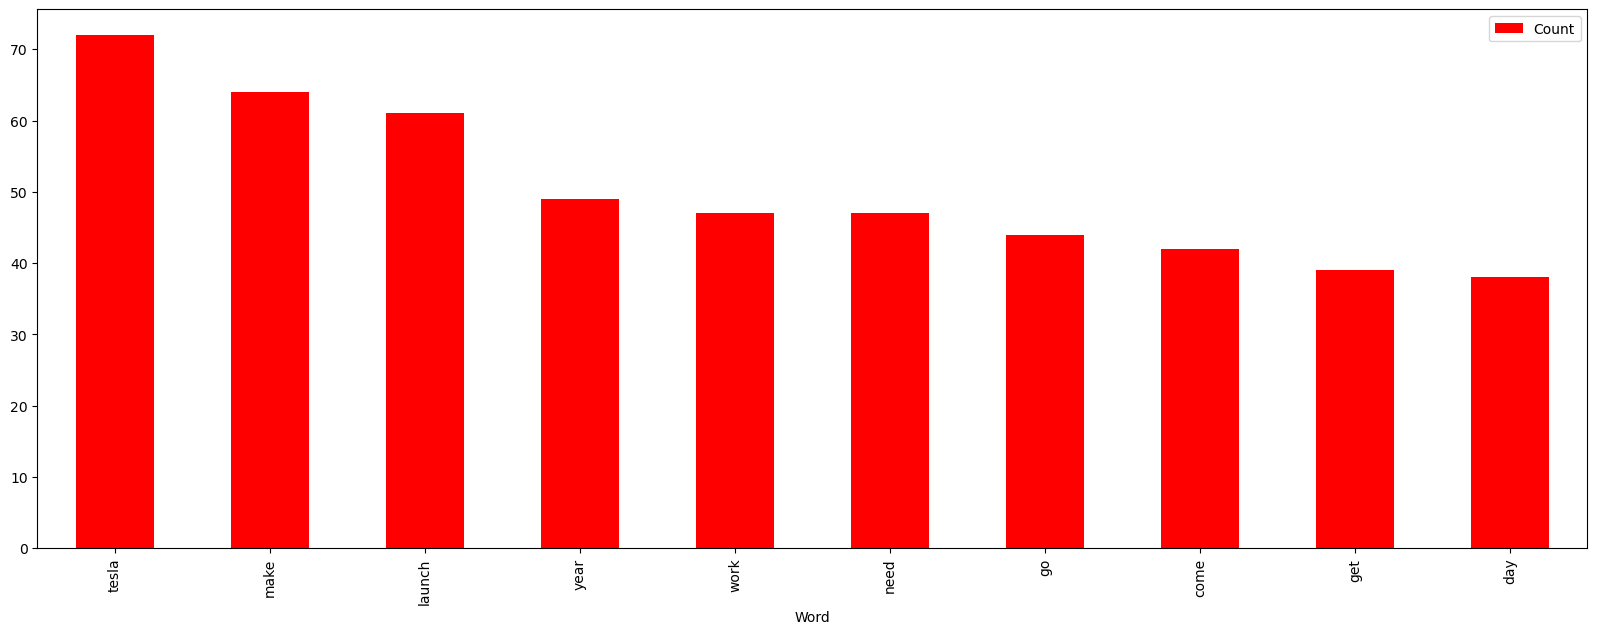

In [45]:
# Top ten Used Word
trend_word[0:10].plot.bar(x='Word',y='Count', figsize=(20,7), color = 'red')

# Emotion Mining 

In [46]:
from nltk import tokenize
sentence = tokenize.sent_tokenize(''.join(cmt))
sentence

['@kunalb11 I’m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my acc

In [47]:
sentence_df = pd.DataFrame(sentence, columns=['Sentence'])
sentence_df

,Sentence
0,@kunalb11 I’m an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
909,"@kenyanwalstreet Not actually a payout, just a..."
910,"It may never pay out, as the stock can’t b… ht..."
911,Details Aug 28.
912,AI symbiosis while u wait @vistacruiser7 @flcn...


In [48]:
# Add Afinn Csv for Emotion Lexicon
afinn = pd.read_csv("C:\Local Disk (A);\Excelr\Assignment Excelr\\11 Text Mining\Afinn.csv", sep=',', encoding='Latin-1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [49]:
affinity_score = afinn.set_index('word')['value'].to_dict()
affinity_score

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [50]:
nlp = spacy.load('en_core_web_sm')

sentiment_lexicon = affinity_score
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
def calculate_sentiment(text:str=None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [51]:
calculate_sentiment(text= 'accidents')

-2

In [52]:
# Calculating sentiment value for each sentence

sentence_df['Sentiment_value'] = sentence_df['Sentence'].apply(calculate_sentiment)
sentence_df

,Sentence,Sentiment_value
0,@kunalb11 I’m an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge is underestimated @teslacn Congr...,3
4,Now on to the next for even more!!,0
...,...,...
909,"@kenyanwalstreet Not actually a payout, just a...",0
910,"It may never pay out, as the stock can’t b… ht...",-4
911,Details Aug 28.,0
912,AI symbiosis while u wait @vistacruiser7 @flcn...,-2


In [53]:
# how many words are there in a sentence
sentence_df['word_count'] = sentence_df['Sentence'].str.split().apply(len)
sentence_df

,Sentence,Sentiment_value,word_count
0,@kunalb11 I’m an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
4,Now on to the next for even more!!,0,8
...,...,...,...
909,"@kenyanwalstreet Not actually a payout, just a...",0,11
910,"It may never pay out, as the stock can’t b… ht...",-4,31
911,Details Aug 28.,0,3
912,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [54]:
# Sort a Ascending order of Sentiment Value
sentence_df.sort_values(by= 'Sentiment_value')

,Sentence,Sentiment_value,word_count
828,Cool Model 3 review by @iamjamiefoxx https://t...,-8,61
640,Very ba… https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
64,"Also, the road to hell is mostly paved with ba...",-7,11
473,"He plays the “poor inventor” card, but was ric...",-5,34
910,"It may never pay out, as the stock can’t b… ht...",-4,31
...,...,...,...
638,It’s… https://t.co/IxhyT6NuiC @Teslarati Tesla...,13,65
578,The “open” areas… https://t.co/rabjKrtQlw @Sav...,14,138
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,231
104,@Erdayastronaut @SpaceX Was also thinking that...,16,94


In [55]:
# Adding index cloumn
sentence_df['index']=range(0,len(sentence_df))
sentence_df

,Sentence,Sentiment_value,word_count,index
0,@kunalb11 I’m an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
909,"@kenyanwalstreet Not actually a payout, just a...",0,11,909
910,"It may never pay out, as the stock can’t b… ht...",-4,31,910
911,Details Aug 28.,0,3,911
912,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47,912


In [56]:
# negative sentiment score of the whole review
sentence_df[sentence_df['Sentiment_value']<=0]

,Sentence,Sentiment_value,word_count,index
0,@kunalb11 I’m an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
4,Now on to the next for even more!!,0,8,4
5,Happy New Year of the Ox!,0,6,5
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14,6
...,...,...,...,...
909,"@kenyanwalstreet Not actually a payout, just a...",0,11,909
910,"It may never pay out, as the stock can’t b… ht...",-4,31,910
911,Details Aug 28.,0,3,911
912,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47,912


In [57]:
# positive sentiment score of the whole review
sentence_df[sentence_df['Sentiment_value']>0]

,Sentence,Sentiment_value,word_count,index
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13,3
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2,10,7
9,The most entertaining outcome is the most like...,3,109,9
17,Back to work I go … @CapybaraSurfer @MattWalla...,4,39,17
...,...,...,...,...
901,He was one of the very best.,3,7,901
903,"@Ali_Afshari In general, we need to improve ho...",4,87,903
905,"@burakaydik True Wow, IHOP &amp; GitHub are cl...",3,15,905
907,This is both great &amp; terrifying.,3,6,907


# Visulization

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sentiment_value', ylabel='Density'>

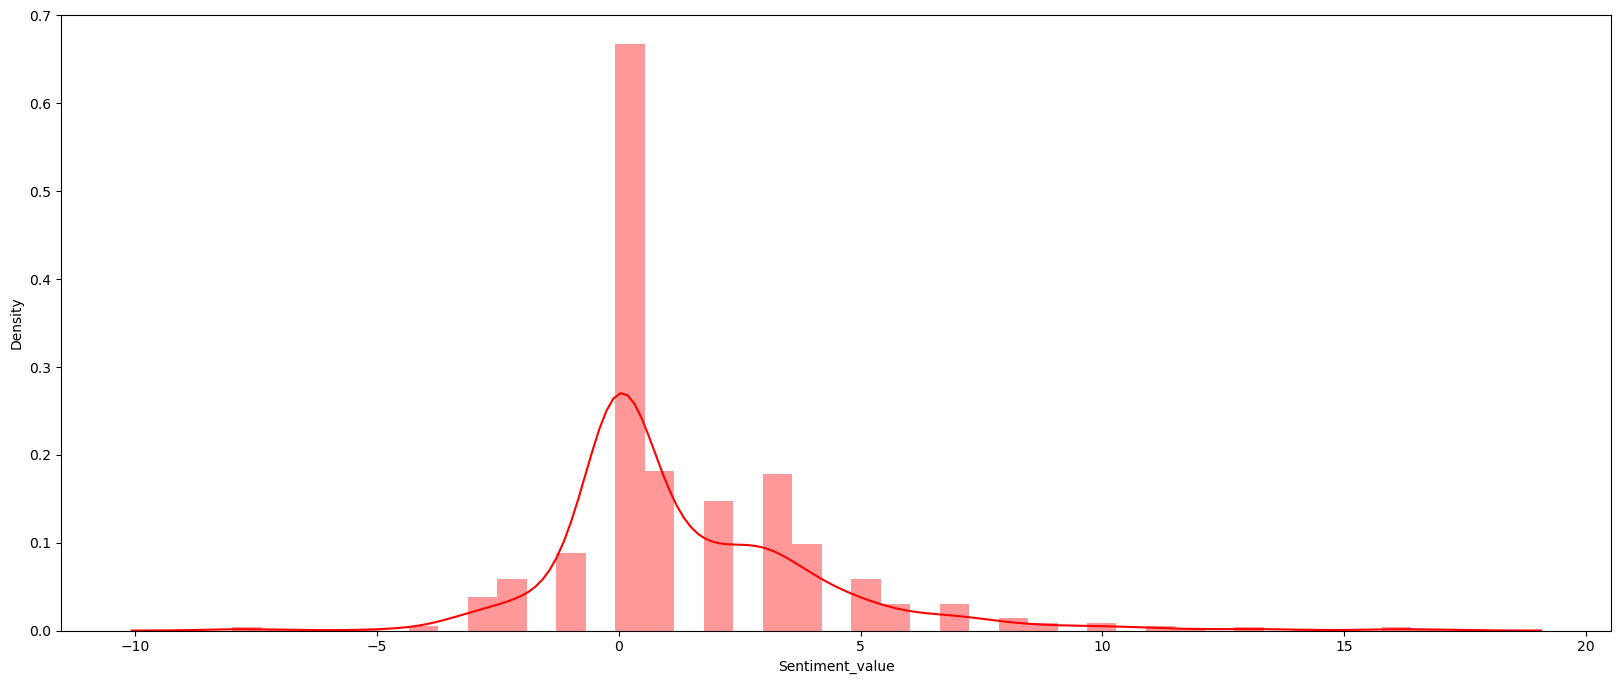

In [58]:
plt.figure(figsize=(20,8))
sns.distplot(sentence_df['Sentiment_value'],color='red')

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='Sentiment_value'>

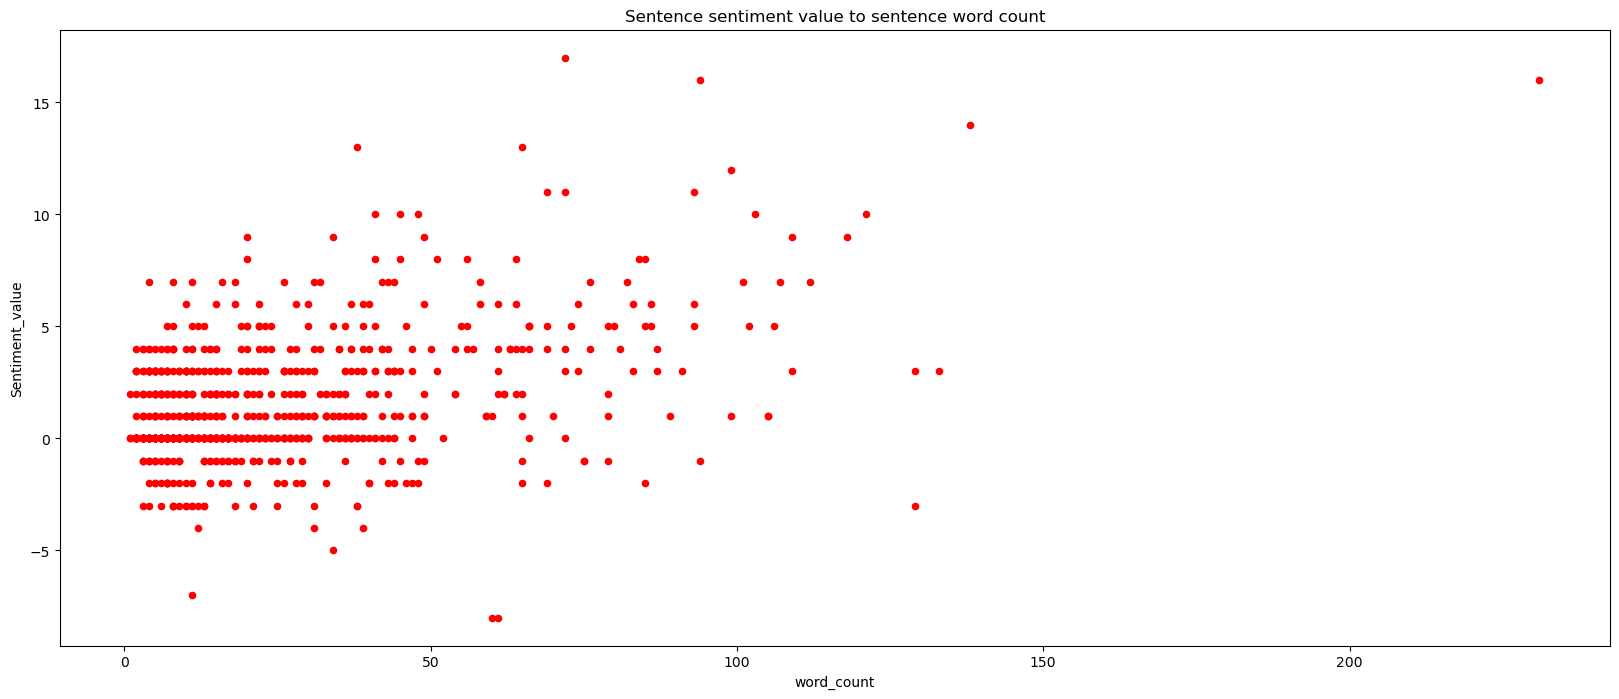

In [59]:
# Correlation analysis
sentence_df.plot.scatter(x='word_count',y='Sentiment_value',title='Sentence sentiment value to sentence word count',figsize=(20,8),color='red')

<AxesSubplot:xlabel='index', ylabel='Sentiment_value'>

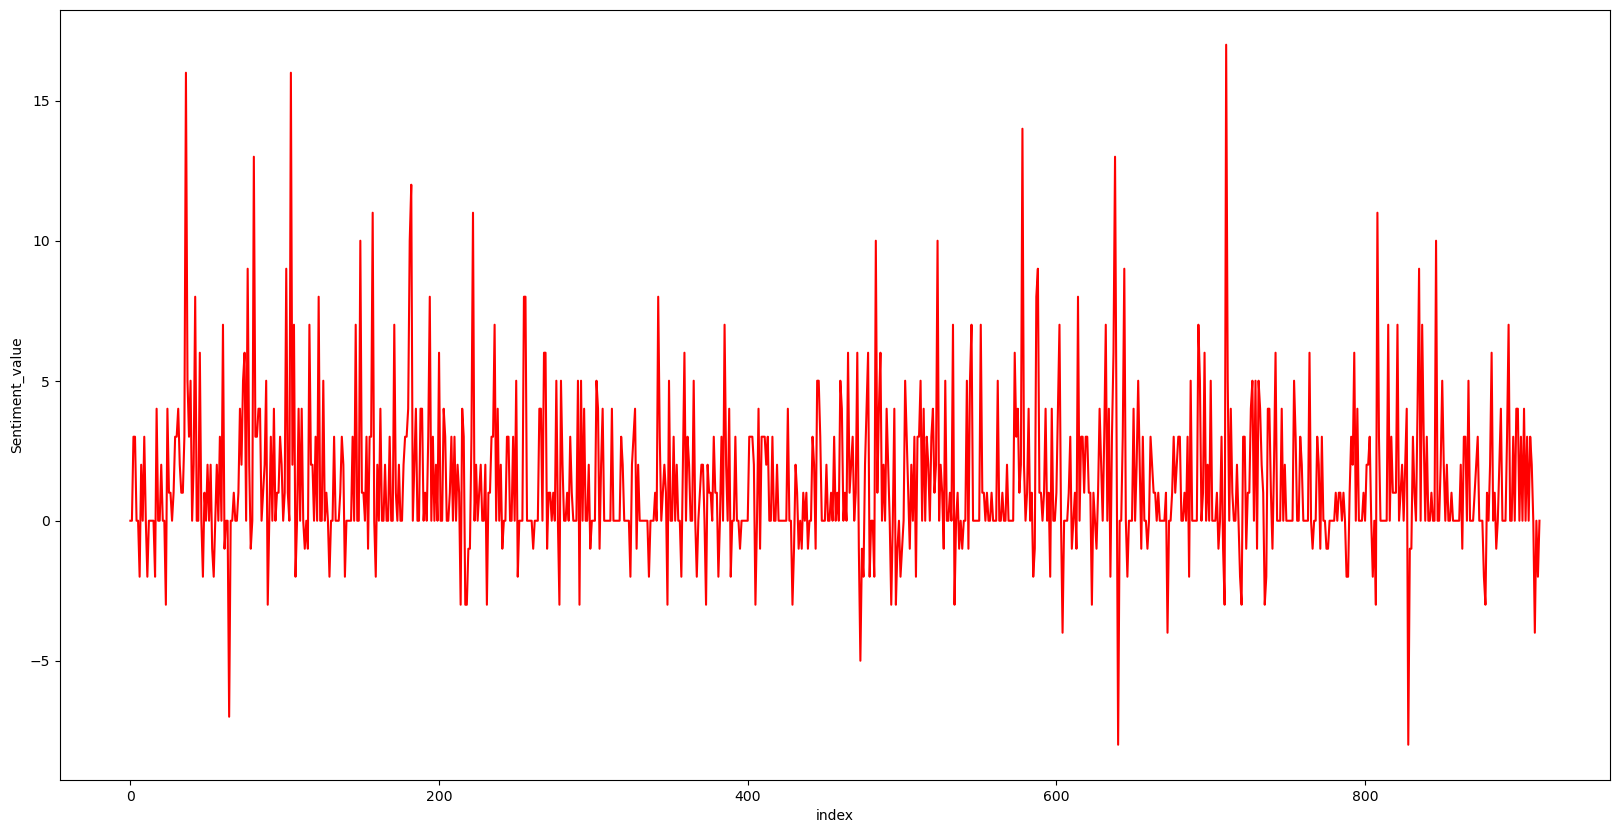

In [60]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(20,10))
sns.lineplot(y='Sentiment_value',x='index',data=sentence_df,color='red')